# Different classification models

## K Nearest Neighbors

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("Classified Data",index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
ss = StandardScaler()
rs = RobustScaler()
ms = MinMaxScaler()

In [5]:
ss.fit(df.drop('TARGET CLASS',axis =1))
ss_scaled = ss.transform(df.drop('TARGET CLASS',axis=1))

In [6]:
rs.fit(df.drop('TARGET CLASS',axis =1))
rs_scaled = rs.transform(df.drop('TARGET CLASS',axis=1))

In [7]:
ms.fit(df.drop('TARGET CLASS',axis =1))
ms_scaled = ms.transform(df.drop('TARGET CLASS',axis=1))

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ss_scaled,df['TARGET CLASS'],
                                                    test_size=0.10)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(76)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [10]:
pred = knn.predict(X_test)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        44
           1       0.93      0.89      0.91        56

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100

[[40  4]
 [ 6 50]]


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(rs_scaled,df['TARGET CLASS'],
                                                    test_size=0.10)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        41
           1       0.93      0.93      0.93        59

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100

[[37  4]
 [ 4 55]]


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ms_scaled,df['TARGET CLASS'],
                                                    test_size=0.10)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        47
           1       0.96      0.91      0.93        53

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100

[[45  2]
 [ 5 48]]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(ss_scaled,df['TARGET CLASS'],
                                                    test_size=0.10)

error_rate = []

# Will take some time
for i in range(1,40):
    np.random.seed(76)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
print(error_rate)

[0.11, 0.1, 0.09, 0.06, 0.07, 0.09, 0.09, 0.08, 0.1, 0.1, 0.1, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.08, 0.09, 0.08, 0.09, 0.08, 0.1, 0.08, 0.09, 0.08, 0.08, 0.07, 0.06, 0.08, 0.08, 0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.09]


Text(0, 0.5, 'Error Rate')

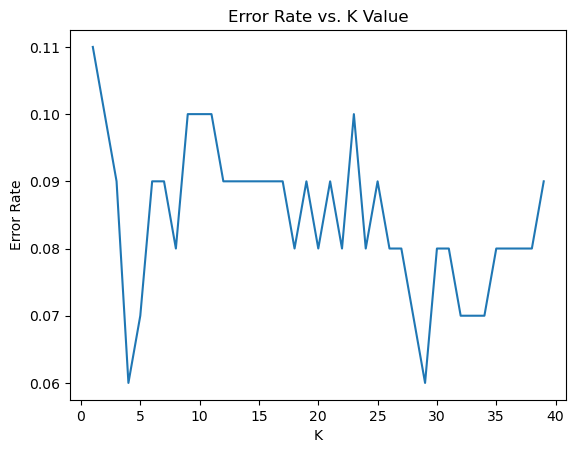

In [15]:
plt.plot(range(1,40),error_rate)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[49 11]
 [ 0 40]]


              precision    recall  f1-score   support

           0       1.00      0.82      0.90        60
           1       0.78      1.00      0.88        40

    accuracy                           0.89       100
   macro avg       0.89      0.91      0.89       100
weighted avg       0.91      0.89      0.89       100



In [17]:
knn = KNeighborsClassifier(n_neighbors=21)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=21')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=21


[[53  7]
 [ 2 38]]


              precision    recall  f1-score   support

           0       0.96      0.88      0.92        60
           1       0.84      0.95      0.89        40

    accuracy                           0.91       100
   macro avg       0.90      0.92      0.91       100
weighted avg       0.92      0.91      0.91       100



In [18]:
X_train, X_test, y_train, y_test = train_test_split(rs_scaled,df['TARGET CLASS'],
                                                    test_size=0.10)

error_rate = []

# Will take some time
for i in range(1,40):
    np.random.seed(76)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
print(error_rate)

[0.08, 0.09, 0.06, 0.06, 0.06, 0.05, 0.07, 0.06, 0.06, 0.05, 0.06, 0.05, 0.06, 0.05, 0.06, 0.06, 0.06, 0.05, 0.06, 0.05, 0.07, 0.06, 0.07, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.05, 0.06, 0.05, 0.06, 0.05, 0.06, 0.04, 0.06]


Text(0, 0.5, 'Error Rate')

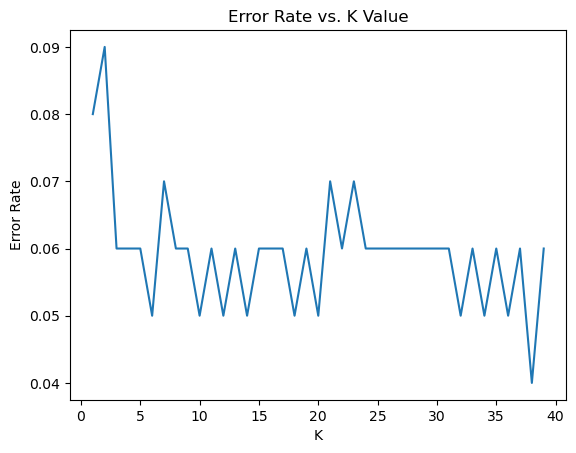

In [19]:
plt.plot(range(1,40),error_rate)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[37  4]
 [ 4 55]]


              precision    recall  f1-score   support

           0       0.90      0.90      0.90        41
           1       0.93      0.93      0.93        59

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



In [21]:
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=21')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=21


[[37  4]
 [ 1 58]]


              precision    recall  f1-score   support

           0       0.97      0.90      0.94        41
           1       0.94      0.98      0.96        59

    accuracy                           0.95       100
   macro avg       0.95      0.94      0.95       100
weighted avg       0.95      0.95      0.95       100



In [22]:
X_train, X_test, y_train, y_test = train_test_split(ms_scaled,df['TARGET CLASS'],
                                                    test_size=0.10)

error_rate = []

# Will take some time
for i in range(1,40):
    np.random.seed(76)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
print(error_rate)

[0.09, 0.09, 0.07, 0.07, 0.07, 0.06, 0.07, 0.07, 0.07, 0.05, 0.04, 0.05, 0.05, 0.04, 0.04, 0.03, 0.04, 0.04, 0.04, 0.05, 0.05, 0.04, 0.07, 0.05, 0.04, 0.05, 0.04, 0.05, 0.05, 0.04, 0.05, 0.04, 0.05, 0.04, 0.07, 0.06, 0.07, 0.06, 0.06]


Text(0, 0.5, 'Error Rate')

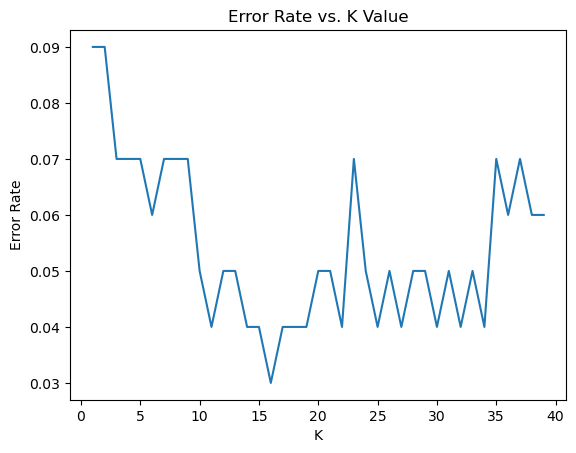

In [23]:
plt.plot(range(1,40),error_rate)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[36  5]
 [ 4 55]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89        41
           1       0.92      0.93      0.92        59

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



In [25]:
knn = KNeighborsClassifier(n_neighbors=26)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=21')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=21


[[37  4]
 [ 1 58]]


              precision    recall  f1-score   support

           0       0.97      0.90      0.94        41
           1       0.94      0.98      0.96        59

    accuracy                           0.95       100
   macro avg       0.95      0.94      0.95       100
weighted avg       0.95      0.95      0.95       100



## Decision Trees

In [26]:
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


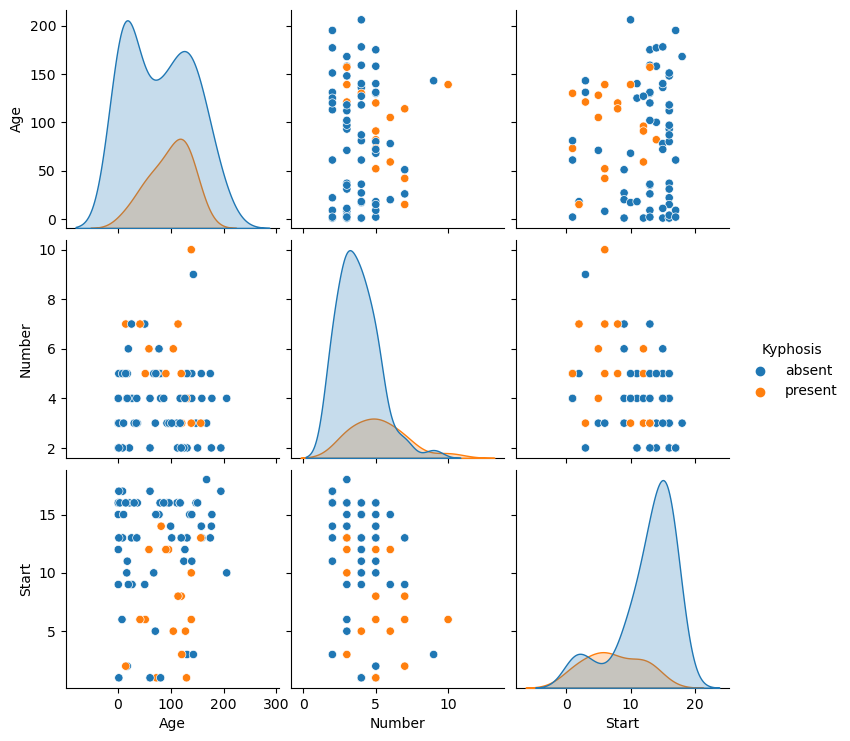

In [27]:
sns.pairplot(df,hue='Kyphosis')

In [28]:
from sklearn.model_selection import train_test_split
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
predictions = dtree.predict(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00         8
     present       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



In [32]:
print(confusion_matrix(y_test,predictions))

[[8 0]
 [0 1]]


## Random forest 

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
rfc_pred = rfc.predict(X_test)

In [38]:
print(confusion_matrix(y_test,rfc_pred))

[[8 0]
 [1 0]]


In [39]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.89      1.00      0.94         8
     present       0.00      0.00      0.00         1

    accuracy                           0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9



/Users/harikrishnadev/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harikrishnadev/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harikrishnadev/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

## Support Vector Machines

In [41]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [42]:
predictions = model.predict(X_test)

In [43]:
print(confusion_matrix(y_test,predictions))

[[8 0]
 [1 0]]


In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.89      1.00      0.94         8
     present       0.00      0.00      0.00         1

    accuracy                           0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9



/Users/harikrishnadev/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harikrishnadev/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/harikrishnadev/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

## Grid search

In [45]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [46]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [47]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.733 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.786 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.786 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.786 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.733 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.786 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.786 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.786 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.800 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [48]:
grid.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [49]:
grid.best_estimator_

SVC(C=10, gamma=0.001)

In [51]:
grid_predictions = grid.predict(X_test)

In [52]:
print(confusion_matrix(y_test,grid_predictions))

[[8 0]
 [0 1]]


In [53]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00         8
     present       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

